In [10]:
import sys
import os

import pickle
import argparse
from sklearn.ensemble.forest import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot as plt
import matplotlib
#pd.options.display.max_columns = None
from fqi.utils import *
from fqi.dataset_preprocessing import *
from fqi.result_plot import heatmap, annotate_heatmap

In [3]:
dataset = prepare_dataset(os.path.join('./trajectory/dataset.csv'),
                              os.path.join('./trajectory/ref_traj.csv'),
                              reward_function='progress', delta_t=0)

In [5]:
cols = ['t'] + state_cols + action_cols + ['r'] + state_prime_cols + ['absorbing']
dataset[['NLap'] + cols]

NLap    t   xCarWorld    yCarWorld  nYawBody      nEngine  NGear  \
1.0  0     1.0  0.0  654.464111  1170.825439  0.016300  18516.05469    7.0   
     1     1.0  0.0  663.245361  1170.965820  0.016300  18537.93335    7.0   
     2     1.0  0.0  672.037170  1171.106201  0.016300  18559.43604    7.0   
     3     1.0  0.0  680.839539  1171.251587  0.016300  18580.44434    7.0   
     4     1.0  0.0  689.652039  1171.398071  0.016300  18601.16455    7.0   
     5     1.0  0.0  698.474487  1171.544556  0.016300  18621.63208    7.0   
     6     1.0  0.0  707.306885  1171.691040  0.016300  18640.79956    7.0   
     7     1.0  0.0  716.148804  1171.837524  0.016300  18660.14038    7.0   
     8     1.0  0.0  725.000000  1171.984009  0.016300  18679.43237    7.0   
     9     1.0  0.0  733.860291  1172.130493  0.016300  18698.00659    7.0   
     10    1.0  0.0  742.729431  1172.276978  0.016300  18714.73267    7.0   
     11    1.0  0.0  751.607178  1172.423462  0.016300  18732.39624    7.0   
     12    1.0  0.0  760.493591  1172.569946  0.016301  18750.52979    7.0   
     13    1.0  0.0  769.387939  1172.716431  0.016301  18765.96802    7.0   
     14    1.0  0.0  778.290161  1172.862915  0.016301  18782.15088    7.0   
     15    1.0  0.0  787.200134  1173.009399  0.016123  18798.75000    7.0   
     16    1.0  0.0  796.117615  1173.146118  0.012515  18815.03662    7.0   
     17    1.0  0.0  805.042786  1173.239258  0.002290  18828.52661    7.0   
     18    1.0  0.0  813.974854  1173.239746 -0.011143  18842.30713    7.0   
     19    1.0  0.0  822.912170  1173.125366 -0.024238  18855.30762    7.0   
     20    1.0  0.0  831.853271  1172.901733 -0.033371  18867.26929    7.0   
     21    1.0  0.0  840.799072  1172.613525 -0.033711  18878.65723    7.0   
     22    1.0  0.0  849.750488  1172.314453 -0.033426  18891.50879    7.0   
     23    1.0  0.0  858.707886  1172.015381 -0.033433  18903.93799    7.0   
     24    1.0  0.0  867.670898  1171.716309 -0.033435  18915.09644    7.0   
     25    1.0  0.0  876.639282  1171.417236 -0.033437  18926.16333    7.0   
     26    1.0  0.0  885.613037  1171.118164 -0.033439  18937.09473    7.0   
     27    1.0  0.0  894.591980  1170.819092 -0.033441  18947.49512    7.0   
     28    1.0  0.0  903.575500  1170.520020 -0.033442  18957.30103    7.0   
     29    1.0  0.0  912.564087  1170.220947 -0.033444  18966.94214    7.0   
...        ...  ...         ...          ...       ...          ...    ...   
50.0 709  50.0  0.0  353.380432  1158.209839  0.056449  18041.61865    6.0   
     710  50.0  0.0  361.471588  1158.667603  0.056449  18103.07251    6.0   
     711  50.0  0.0  369.590607  1159.125366  0.056449  18163.46191    6.0   
     712  50.0  0.0  377.737000  1159.584351  0.056449  18222.79541    6.0   
     713  50.0  0.0  385.910309  1160.048218  0.056449  18281.08276    6.0   
     714  50.0  0.0  394.109985  1160.512085  0.056449  18338.36670    6.0   
     715  50.0  0.0  402.335724  1160.975952  0.056449  18394.61548    6.0   
     716  50.0  0.0  410.586914  1161.440063  0.056449  18449.89136    6.0   
     717  50.0  0.0  418.863190  1161.910034  0.056449  18504.16992    6.0   
     718  50.0  0.0  427.164032  1162.380005  0.056449  18557.49878    6.0   
     719  50.0  0.0  435.489044  1162.849976  0.056449  18609.86206    6.0   
     720  50.0  0.0  443.837830  1163.319946  0.055967  18661.30493    6.0   
     721  50.0  0.0  452.210297  1163.786377  0.054349  18711.81763    6.0   
     722  50.0  0.0  460.606323  1164.241455  0.052804  18761.40503    6.0   
     723  50.0  0.0  469.025513  1164.684937  0.051241  18810.08911    6.0   
     724  50.0  0.0  477.467377  1165.116577  0.049770  18318.72925    7.0   
     725  50.0  0.0  485.928192  1165.536499  0.048289  17949.65942    7.0   
     726  50.0  0.0  494.405884  1165.944580  0.046432  17936.01685    7.0   
     727  50.0  0.0  502.900513  1166.331177  0.041099  17964.94507    7.0   
     728  50.0  0.0  511.412659 

In [6]:
dataset[state_cols].describe()

,xCarWorld,yCarWorld,nYawBody,nEngine,NGear,positionRho,positionTheta,positionReferenceX,positionReferenceY,positionRelativeX,...,speedDifferenceOfModules,actualAccelerationX,actualAccelerationY,referenceAccelerationX,referenceAccelerationY,accelerationDiffX,accelerationDiffY,prevaSteerWheel,prevpBrakeF,prevrThrottlePedal
count,36762.000000,36762.000000,36762.000000,36762.000000,36762.000000,36762.000000,36762.000000,36762.000000,36762.000000,36762.000000,...,36762.000000,36762.000000,36762.000000,36762.000000,36762.000000,36762.000000,36762.000000,36762.000000,36762.000000,36762.000000
mean,1298.572341,776.081528,0.408772,17974.389020,5.669659,21.376868,-0.251104,1284.874140,784.309637,13.464912,...,11.085512,0.414227,-4.956825,0.335250,-5.018633,-0.078977,-0.061808,-0.045556,0.023449,0.837319
std,720.700932,376.452044,1.969051,1411.670371,1.582616,157.775003,2.002472,719.936424,377.098836,139.176531,...,27.387116,8.032780,15.200403,7.520783,16.004627,5.962031,8.890714,0.167817,0.127768,0.321703
min,13.553574,42.591827,-3.141591,5235.988160,-1.000000,0.005536,-3.141524,34.999535,46.047585,-590.477346,...,-75.752653,-48.068222,-76.191658,-46.784386,-55.210712,-49.063163,-95.411106,-0.843328,0.000000,0.000000
25%,677.712769,479.361069,-1.133539,17418.704530,4.000000,0.786815,-1.890917,626.851990,492.379082,-0.591923,...,0.034690,0.088213,-11.933448,0.103905,-11.256322,-0.453780,-3.047577,-0.027477,0.000000,0.930561
50%,1375.161926,893.412262,0.039550,18440.995485,7.000000,1.359511,-1.618101,1347.510742,893.407349,-0.381727,...,1.280484,0.792080,-0.000353,0.692939,-0.000577,-0.060316,0.000004,-0.000000,0.000000,1.000000
75%,1967.800812,1149.735077,2.370898,18982.471005,7.000000,2.366637,1.803424,1960.821655,1158.893433,-0.185365,...,11.006794,3.418640,0.004228,2.975538,0.086860,0.033316,2.969445,-0.000000,0.000000,1.000000
max,2312.455078,1182.149170,3.141583,20178.295900,7.000000,1969.921087,3.140561,2308.110840,1179.792114,1688.201638,...,306.904240,43.206707,75.739304,12.588207,59.003960,48.010749,64.464266,0.930765,1.000000,1.000000


In [8]:
corr_df = dataset.corr()
corr_df

,NLap,t,xCarWorld,yCarWorld,nYawBody,nEngine,NGear,positionRho,positionTheta,positionReferenceX,...,prime_actualAccelerationX,prime_actualAccelerationY,prime_referenceAccelerationX,prime_referenceAccelerationY,prime_accelerationDiffX,prime_accelerationDiffY,prime_prevaSteerWheel,prime_prevpBrakeF,prime_prevrThrottlePedal,absorbing
NLap,1.000000,NaN,0.003294,-0.000484,-0.001937,0.050889,0.068912,0.111641,-0.010268,-0.014072,...,-0.000576,-0.008071,0.010135,0.004581,0.013560,0.022037,-0.042976,-0.014598,0.051527,0.000583
t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xCarWorld,0.003294,NaN,1.000000,-0.644803,-0.289102,0.082105,0.060364,0.061873,0.148823,0.981455,...,-0.067867,0.023154,-0.058752,0.026588,0.017329,0.008275,0.005060,0.041387,-0.012917,-0.034321
yCarWorld,-0.000484,NaN,-0.644803,1.000000,0.058986,0.321927,0.410989,-0.056031,-0.160589,-0.632955,...,0.044010,0.032792,0.040404,0.045520,-0.008330,0.025872,0.195953,-0.139784,0.275153,0.037783
nYawBody,-0.001937,NaN,-0.289102,0.058986,1.000000,-0.138322,-0.107734,-0.017109,0.074021,-0.284686,...,0.039129,0.107014,0.061906,0.118120,0.025367,0.029672,0.006061,-0.033272,-0.081995,-0.007136
nEngine,0.050889,NaN,0.082105,0.321927,-0.138322,1.000000,0.687727,-0.033564,-0.081191,0.085573,...,0.173922,0.233990,0.154042,0.225377,-0.040021,0.005680,0.312520,-0.232294,0.684009,0.009151
NGear,0.068912,NaN,0.060364,0.410989,-0.107734,0.687727,1.000000,-0.011920,-0.064025,0.059101,...,-0.167274,0.246228,-0.101798,0.257283,0.096963,0.042178,0.342775,-0.054267,0.483449,0.027539
positionRho,0.111641,NaN,0.061873,-0.056031,-0.017109,-0.033564,-0.011920,1.000000,-0.024559,-0.115764,...,-0.003547,-0.014327,0.016547,0.027347,0.025651,0.073695,-0.001803,0.004550,-0.008973,-0.004372
positionTheta,-0.010268,NaN,0.148823,-0.160589,0.074021,-0.081191,-0.064025,-0.024559,1.000000,0.147987,...,-0.050255,-0.059181,-0.026208,0.053246,0.034652,0.196955,-0.133331,0.018668,-0.114604,-0.011218
positionReferenceX,-0.014072,NaN,0.981455,-0.632955,-0.284686,0.085573,0.059101,-0.115764,0.147987,1.000000,...,-0.067013,0.022496,-0.060840,0.022045,0.013545,0.001226,0.001059,0.041133,-0.012852,-0.033637


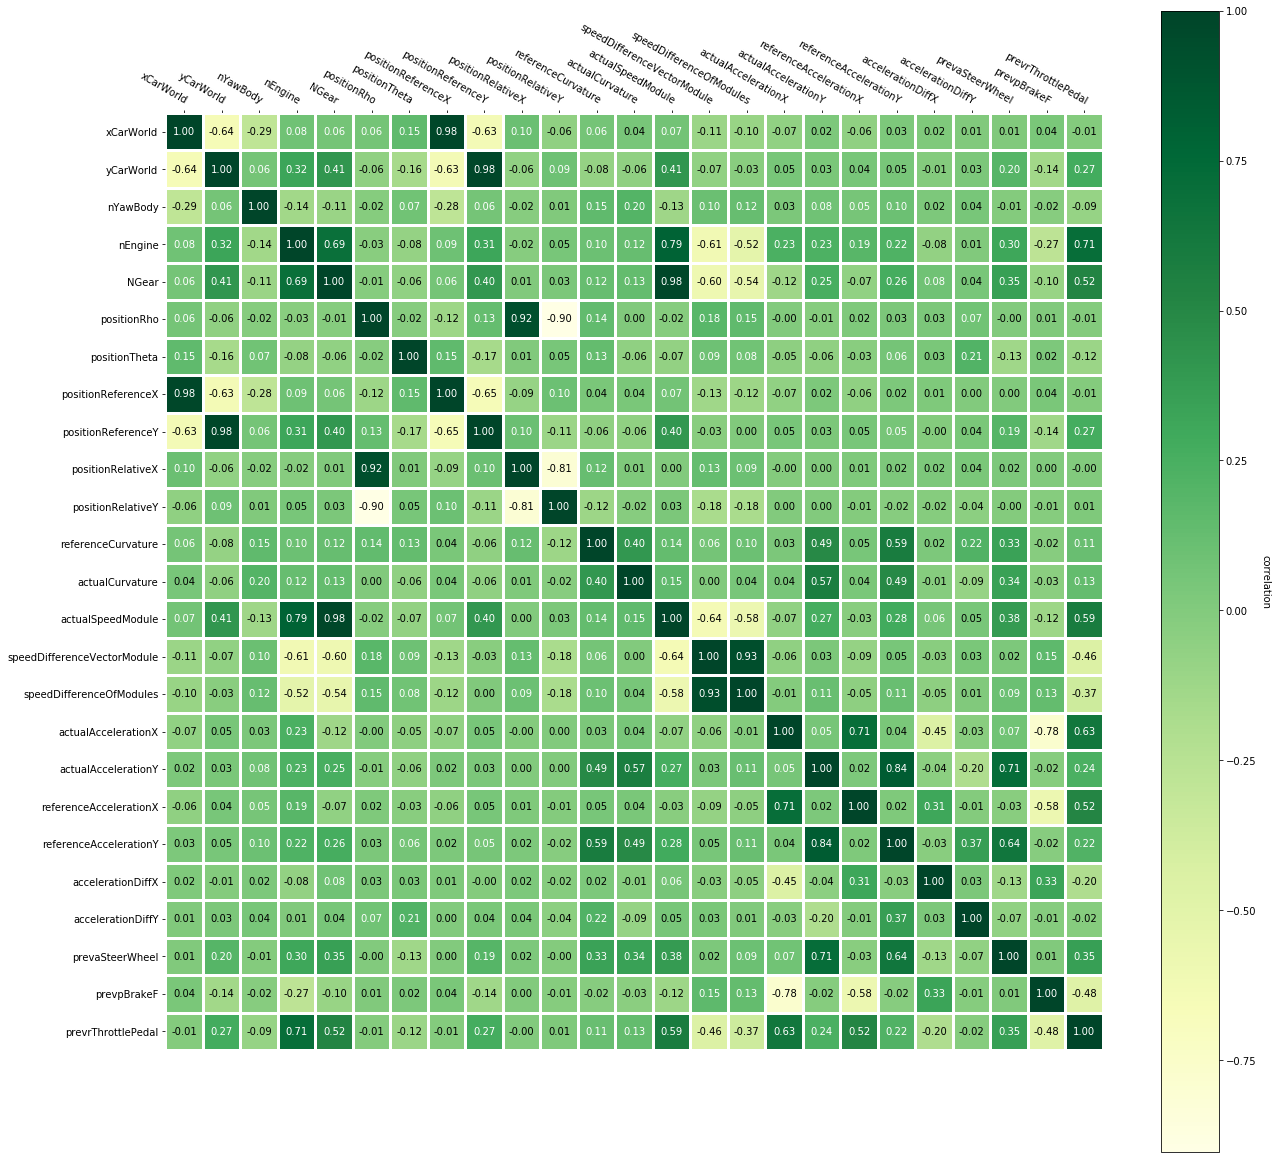

In [19]:
f, ax = plt.subplots(figsize=(21,21))
im, cbar = heatmap(corr_df[state_cols].loc[state_cols].values, state_cols, state_cols, ax=ax,
                  cmap="YlGn", cbarlabel="correlation")
t = annotate_heatmap(im, valfmt='{x:.2f}')